In [1]:
# Imports
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
# from utils import find_clusters, plot_distribution_cluster
import warnings
import pickle
from utils import find_clusters, plot_distribution_cluster
warnings.filterwarnings('ignore')

## Data Exploration

In [2]:
df = pd.read_csv('../Datasets/cancer_raw.csv')
print(df.shape)
print('\nLabel typed'); print(df.dtypes)
print('\nNull values:'); print(df.isnull().sum().sum())

(1000, 26)

Label typed
index                        int64
Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object

Null values:
0


In [3]:
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


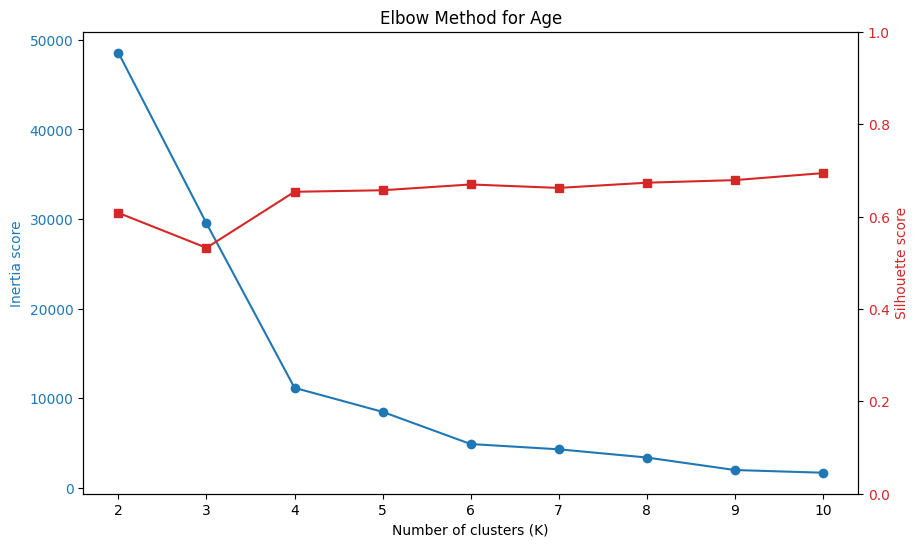

In [4]:
find_clusters(df, 'Age')

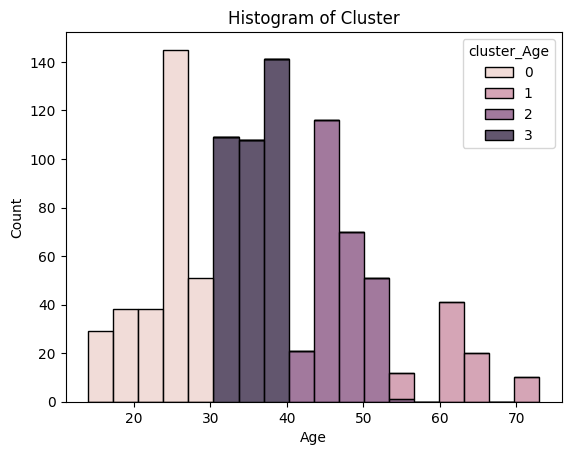

In [5]:
plot_distribution_cluster(df, 'Age', 4)
df.drop('cluster_Age', axis=1, inplace=True)

## Description

- **Age**: The age of the patient. (Numeric)

- **Gender**: The gender of the patient. (Categorical)

- **Air Pollution**: The level of air pollution exposure of the patient. (Categorical)

- **Alcohol use**: The level of alcohol use of the patient. (Categorical)

- **Dust Allergy**: The level of dust allergy of the patient. (Categorical)

- **OccuPational Hazards**: The level of occupational hazards of the patient. (Categorical)

- **Genetic Risk**: The level of genetic risk of the patient. (Categorical)

- **Chronic Lung Disease**: The level of chronic lung disease of the patient. (Categorical)

- **Balanced Diet**: The level of balanced diet of the patient. (Categorical)

- **Obesity**: The level of obesity of the patient. (Categorical)

- **Smoking**: The level of smoking of the patient. (Categorical)

- **Passive Smoker**: The level of passive smoker of the patient. (Categorical)

- **Chest Pain**: The level of chest pain of the patient. (Categorical)

- **Coughing of Blood**: The level of coughing of blood of the patient. (Categorical)

- **Fatigue**: The level of fatigue of the patient. (Categorical)

- **Weight Loss**: The level of weight loss of the patient. (Categorical)

- **Shortness of Breath**: The level of shortness of breath of the patient. (Categorical)

- **Wheezing**: The level of wheezing of the patient. (Categorical)

- **Swallowing Difficulty**: The level of swallowing difficulty of the patient. (Categorical)

- **Clubbing of Finger Nails**: The level of clubbing of finger nails of the patient. (Categorical)


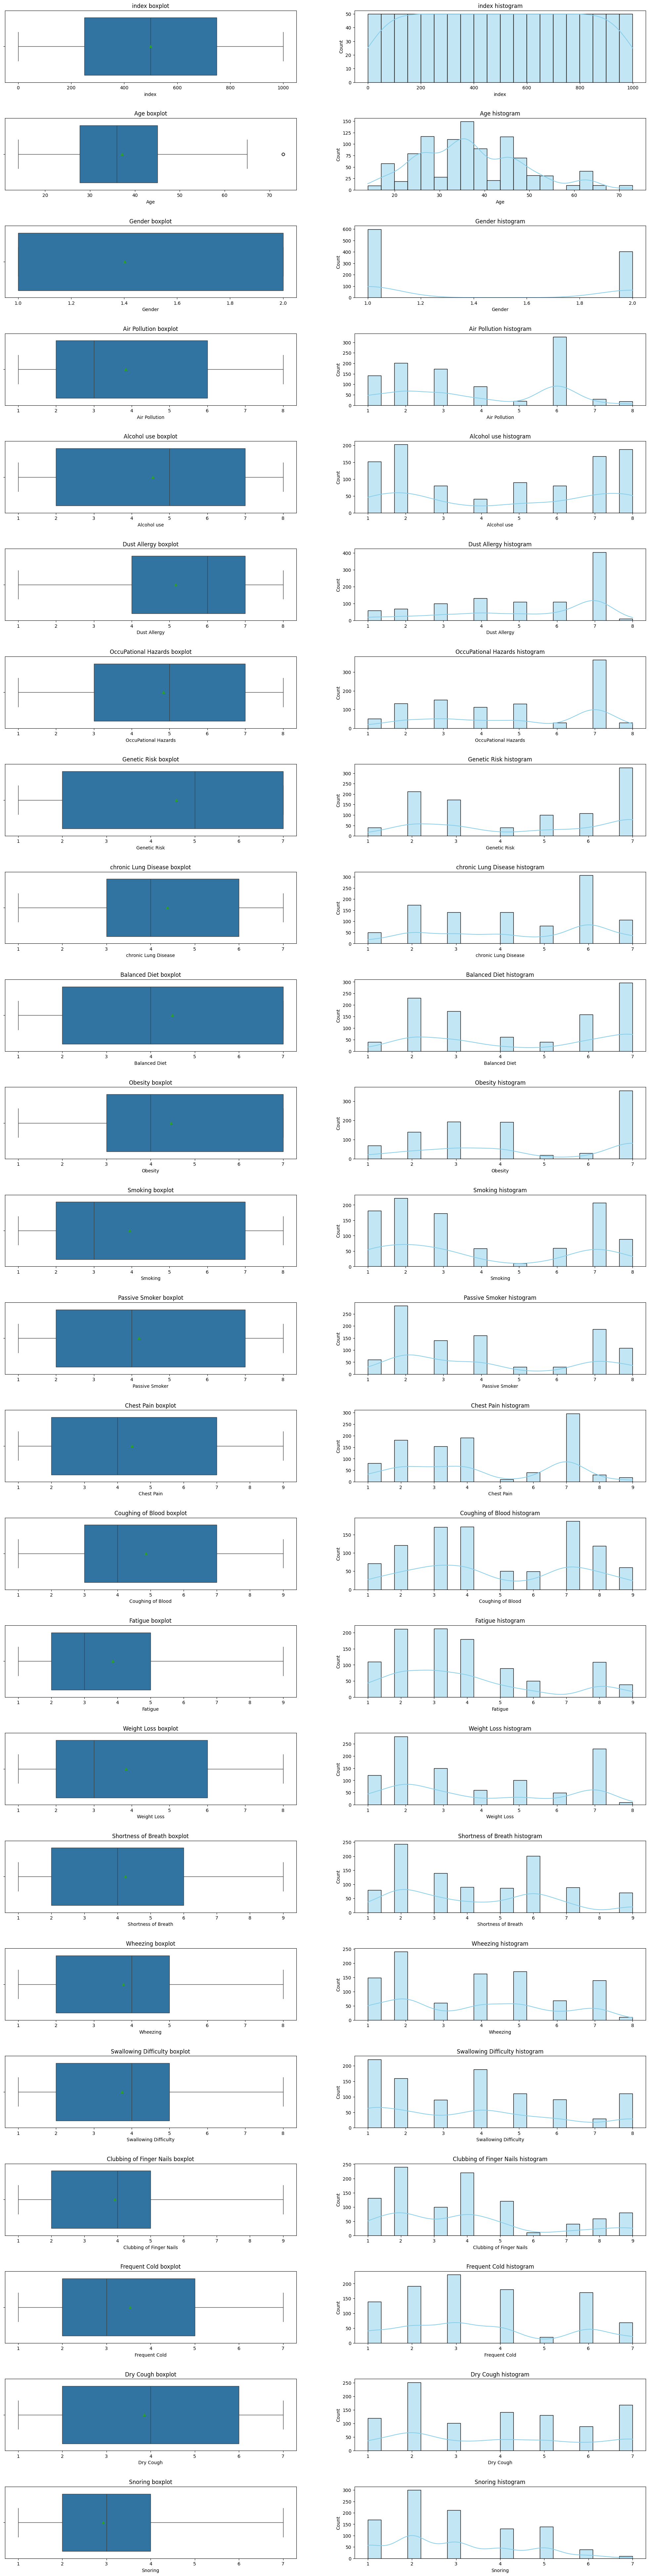

In [6]:
# Analysis of numerical attributes
plt.figure(figsize=(25, 100))

i = 1
for attribute in df.columns :
    if str(df[attribute].dtype) == 'int64' :
        plt.subplot(24, 2, i)
        sns.boxplot(data=df, x=attribute, showfliers=True, showmeans=True)
        plt.title(f'{attribute} boxplot')

        plt.subplot(24, 2, i+1)
        sns.histplot(df[attribute], bins=20, kde=True, color='skyblue')
        plt.title(f'{attribute} histogram')

        i += 2

plt.subplots_adjust(hspace=0.5)
plt.show()

In [7]:
# remove indexes and ids
df_encoded = df.iloc[:, 2:]

# Encode 'Level'
# le = LabelEncoder()
# df_encoded['Level'] = le.fit_transform(df['Level'])
# df_encoded

# Groups ages
bins = [0, 30, 40, 55, 100]
labels = {'0-30' : 0, '31-40' : 1, '41-55' : 2, '56+' : 3}
df_encoded['Age Group'] = pd.cut(df_encoded['Age'], bins=bins, labels=labels.values(), right=False)
df_encoded.drop('Age', axis=1, inplace=True)

df_encoded = pd.get_dummies(df_encoded, columns=['Age Group'])


In [8]:
df_encoded['Level'] = df_encoded['Level'].map(lambda x: x == 'High') # focus on High Level

In [9]:
df_encoded

,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,...,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,Age Group_0,Age Group_1,Age Group_2,Age Group_3
0,1,2,4,5,4,3,2,2,4,3,...,3,1,2,3,4,False,False,True,False,False
1,1,3,1,5,3,4,2,2,2,2,...,6,2,1,7,2,False,True,False,False,False
2,1,4,5,6,5,5,4,6,7,2,...,1,4,6,7,2,True,False,True,False,False
3,1,7,7,7,7,6,7,7,7,7,...,4,5,6,7,5,True,False,True,False,False
4,1,6,8,7,7,7,6,7,7,8,...,4,2,4,2,3,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,6,7,7,7,7,6,7,7,7,...,8,2,4,5,3,True,False,False,True,False
996,2,6,8,7,7,7,6,7,7,7,...,2,4,3,1,4,True,False,True,False,False
997,2,4,5,6,5,5,4,6,7,2,...,1,4,6,7,2,True,True,False,False,False
998,2,6,8,7,7,7,6,7,7,8,...,4,2,4,2,3,True,True,False,False,False


In [10]:
list(df_encoded.columns)

['Gender',
 'Air Pollution',
 'Alcohol use',
 'Dust Allergy',
 'OccuPational Hazards',
 'Genetic Risk',
 'chronic Lung Disease',
 'Balanced Diet',
 'Obesity',
 'Smoking',
 'Passive Smoker',
 'Chest Pain',
 'Coughing of Blood',
 'Fatigue',
 'Weight Loss',
 'Shortness of Breath',
 'Wheezing',
 'Swallowing Difficulty',
 'Clubbing of Finger Nails',
 'Frequent Cold',
 'Dry Cough',
 'Snoring',
 'Level',
 'Age Group_0',
 'Age Group_1',
 'Age Group_2',
 'Age Group_3']

In [11]:
df_encoded.drop(labels=['Age Group_0', 'Age Group_1', 'Age Group_2', 'Age Group_3', 'Gender'], axis=1, inplace=True)

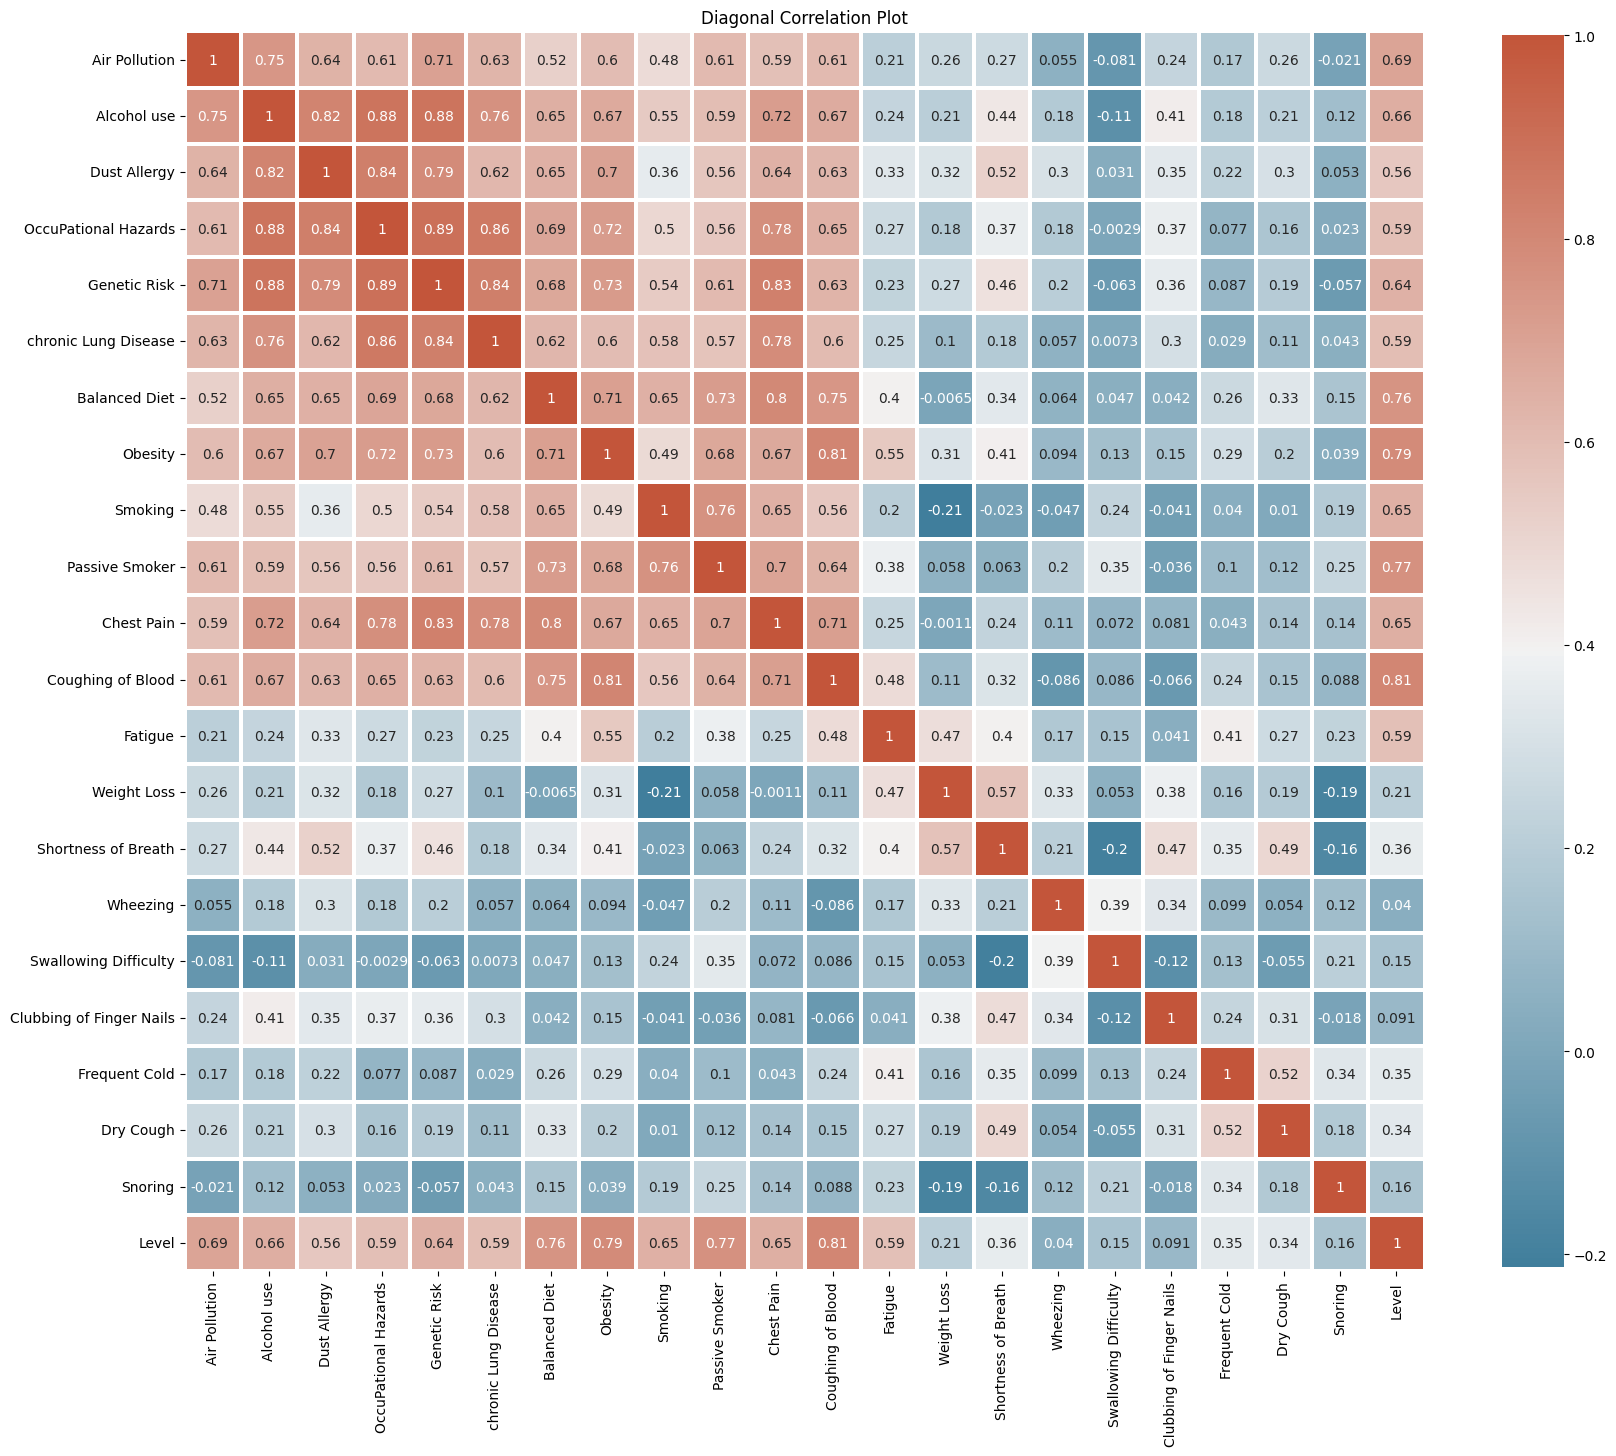

In [12]:
from matplotlib import pyplot as plt
import numpy as np


plt.figure(figsize=(20,20))
corr = df_encoded.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.title('Diagonal Correlation Plot')
sns.heatmap(corr, 
            # mask=mask, 
            annot=True, 
            cmap=sns.diverging_palette(230, 20, as_cmap=True),   
            square = True,                                 
            linewidths = 1.5,
            cbar_kws = {"shrink": .8});

In [13]:
df_encoded[['Weight Loss', 'Wheezing']].corr()

,Weight Loss,Wheezing
Weight Loss,1.000000,0.331179
Wheezing,0.331179,1.000000


In [14]:
label_values = {col : np.sort(list(df_encoded[col].unique())) for col in df_encoded.columns}

In [15]:
# We save the dataset in order to be used by the Bayesian Network
df_encoded.to_csv('../Datasets/cancer.csv', index=False)

# We save the dictionary in order to be used for queries in the Bayesian Network
with open('../label_values.pkl', 'wb') as pickle_file:
    pickle.dump(label_values, pickle_file)

In [16]:
from itertools import product

tuple = list(product(df_encoded.columns, df_encoded.columns))
d = {t : df_encoded[list(t)].corr().iloc[0, 1] for t in tuple if t[0]!=t[1]}

In [17]:
len(d.keys())

462

In [18]:
treshold = 0.8
L = {}
for k, v in d.items():
    if abs(v) >= treshold:
        if (k[1], k[0]) not in L.keys():
            L[k] = v

In [19]:
len(list(L.keys()))

10

In [20]:
list(L.keys())

[('Alcohol use', 'Dust Allergy'),
 ('Alcohol use', 'OccuPational Hazards'),
 ('Alcohol use', 'Genetic Risk'),
 ('Dust Allergy', 'OccuPational Hazards'),
 ('OccuPational Hazards', 'Genetic Risk'),
 ('OccuPational Hazards', 'chronic Lung Disease'),
 ('Genetic Risk', 'chronic Lung Disease'),
 ('Genetic Risk', 'Chest Pain'),
 ('Obesity', 'Coughing of Blood'),
 ('Coughing of Blood', 'Level')]